In [ ]:
from keras.datasets import mnist

In [ ]:
(trainX,trainY),(testX,testY) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
testX.shape

(10000, 28, 28)

In [ ]:
trainX_01=trainX.astype('float32')/255
testX_01=testX.astype('float32')/255

In [ ]:
trainX=trainX.reshape(60000,28*28)
testX=testX.reshape(10000,28*28)

In [ ]:
trainX.shape

(60000, 784)

In [ ]:
print(trainY[38])

7


In [ ]:
from keras.utils import to_categorical

In [ ]:
trainY=to_categorical(trainY)
testY=to_categorical(testY)

In [ ]:
print(trainY[38])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
from keras import models
from keras import layers

In [ ]:
def mnist1():
  model=models.Sequential()
  model.add(layers.Dense(units=512,activation='relu',input_shape=(28*28,)))
  model.add(layers.Dense(units=256,activation='relu'))
  model.add(layers.Dense(units=10,activation='softmax'))
  model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model=mnist1()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(trainX,trainY,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8019 - loss: 13.5576 - val_accuracy: 0.9190 - val_loss: 0.5699
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9263 - loss: 0.4279 - val_accuracy: 0.9383 - val_loss: 0.3848
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9474 - loss: 0.2811 - val_accuracy: 0.9526 - val_loss: 0.2754
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9555 - loss: 0.2253 - val_accuracy: 0.9605 - val_loss: 0.2537
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9608 - loss: 0.1882 - val_accuracy: 0.9564 - val_loss: 0.3162
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9671 - loss: 0.1635 - val_accuracy: 0.9545 - val_loss: 0.2923
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9721 - loss: 0.1516 - val_accuracy: 0.9618 - val_loss: 0.2700
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9746 - loss: 0.1321 - val_ac

In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

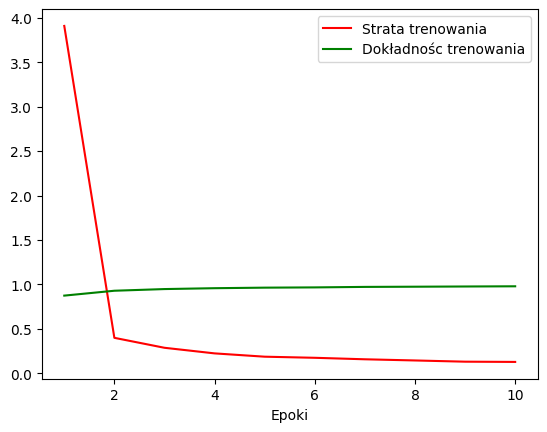

In [ ]:
loss=history.history['loss']
acc=history.history['accuracy']
plt.plot(range(1,11),loss,'r',label='Strata trenowania')
plt.plot(range(1,11),acc,'g',label='Dokładnośc trenowania')
plt.xlabel('Epoki')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

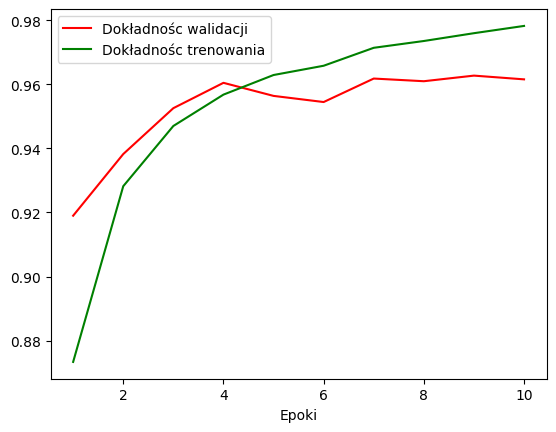

In [ ]:
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
plt.plot(range(1,11),val_acc,'r',label='Dokładnośc walidacji')
plt.plot(range(1,11),acc,'g',label='Dokładnośc trenowania')
plt.xlabel('Epoki')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

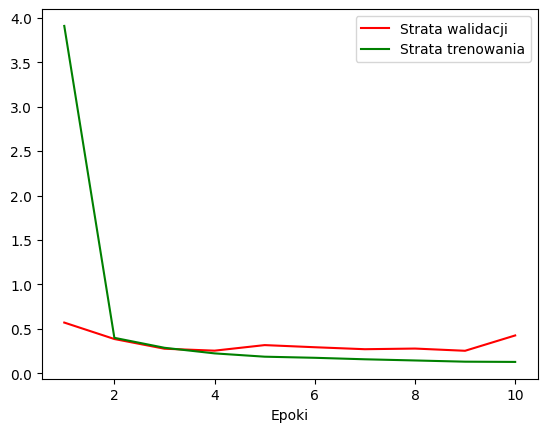

In [ ]:
val_loss=history.history['val_loss']
loss=history.history['loss']
plt.plot(range(1,11),val_loss,'r',label='Strata walidacji')
plt.plot(range(1,11),loss,'g',label='Strata trenowania')
plt.xlabel('Epoki')
plt.legend()
plt.show

In [ ]:
test_loss, test_acc =model.evaluate(testX,testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9575 - loss: 0.5427


In [ ]:
print(test_loss)

0.4289295971393585


In [ ]:
print(test_acc)

0.9635000228881836


In [ ]:
model.save('mnist1.keras')

In [ ]:
digit_recognition=models.load_model('mnist1.keras')

In [ ]:
pred=digit_recognition.predict(testX[29].reshape(1,28*28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [ ]:
print(pred)

[[0.000000e+00 1.000000e+00 0.000000e+00 1.710532e-37 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]


In [ ]:
testY[29]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])